In [1]:
# Imports - you can add any other permitted libraries
import numpy as np

# You may add any other functions to make your code more modular. However,
# do not change the function signatures (name and arguments) of the given functions,
# as these functions will be called by the autograder.

class LogisticRegressor:
    # Assume Binary Classification
    def __init__(self):
        self.theta = None
    
    def _normalize(self, X):
        """Normalize features using mean and standard deviation."""
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        return (X - mean) / std
    
    def _sigmoid(self, z):
        """Compute the sigmoid function."""
        return 1 / (1 + np.exp(-z))
    
    def _compute_gradient(self, X, y, h):
        """Compute the gradient of the log-likelihood function."""
        return X.T @ (h - y)
    
    def _compute_hessian(self, X, h):
        """Compute the Hessian matrix of the log-likelihood function."""
        S = np.diag(h * (1 - h))  # Diagonal matrix of weights
        return X.T @ S @ X
    
    def fit(self, X, y, learning_rate=0.01, max_iter=100, tol=1e-6):
        """
        Fit the linear regression model to the data using Newton's Method.
        Remember to normalize the input data X before fitting the model.
        
        Parameters
        ----------
        X : numpy array of shape (n_samples, n_features)
            The input data.
            
        y : numpy array of shape (n_samples,)
            The target labels - 0 or 1.
        
        learning_rate : float
            The learning rate to use in the update rule.
        
        Returns
        -------
        List of Parameters: numpy array of shape (n_iter, n_features+1,)
            The list of parameters obtained after each iteration of Newton's Method.
        """
        X = self._normalize(X)
        n_samples, n_features = X.shape
        X = np.c_[np.ones(n_samples), X]  # Add bias term
        self.theta = np.zeros(X.shape[1])
        theta_list = []
        
        for _ in range(max_iter):
            z = X @ self.theta
            h = self._sigmoid(z)
            gradient = self._compute_gradient(X, y, h)
            hessian = self._compute_hessian(X, h)
            
            # Newton's update step: theta = theta - H^(-1) * gradient
            theta_update = np.linalg.inv(hessian) @ gradient
            self.theta -= theta_update
            theta_list.append(self.theta.copy())
            
            # Convergence check
            if np.linalg.norm(theta_update) < tol:
                break
        
        return np.array(theta_list)
    
    def predict(self, X):
        """
        Predict the target values for the input data.
        
        Parameters
        ----------
        X : numpy array of shape (n_samples, n_features)
            The input data.
            
        Returns
        -------
        y_pred : numpy array of shape (n_samples,)
            The predicted target label.
        """
        X = self._normalize(X)
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        probabilities = self._sigmoid(X @ self.theta)
        return (probabilities >= 0.5).astype(int)

In [7]:
# Load data and compute theta values
X = np.loadtxt('../data/Q3/logisticX.csv', delimiter=',')
y = np.loadtxt('../data/Q3/logisticY.csv', delimiter=',')

model = LogisticRegressor()
theta_values = model.fit(X, y)
print("Final theta values:", model.theta)

Final theta values: [ 0.40125316  2.5885477  -2.72558849]


In [6]:
# Split data into 80% training and 20% testing
train_size = int(0.8 * X.shape[0])
X_train, Y_train = X[:train_size], y[:train_size]
X_test, Y_test = X[train_size:], y[train_size:]

In [3]:
import matplotlib.pyplot as plt

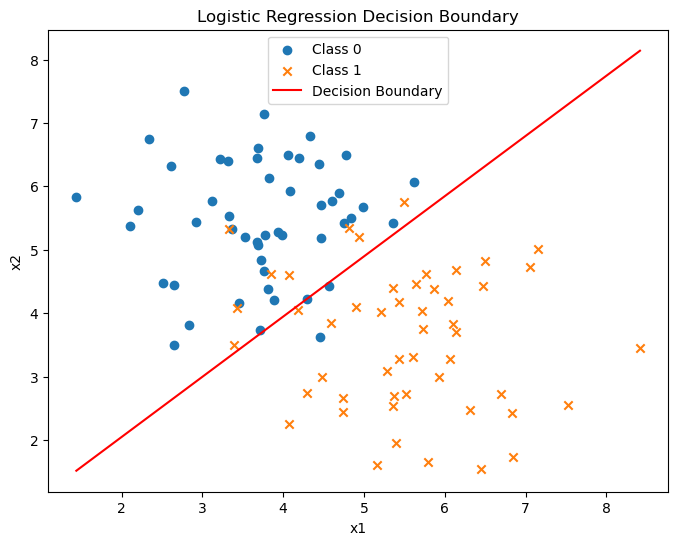

In [8]:
# Plot training data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', label='Class 1')

# Plot decision boundary
x1_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
x2_vals = -(model.theta[0] + model.theta[1] * x1_vals) / model.theta[2]
plt.plot(x1_vals, x2_vals, 'r-', label='Decision Boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()